In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_data, test_data = train_data/255, test_data/255

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,use_bias=True,
    activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.00125), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

model.fit(train_data, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(test_acc)

probability_model= tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions=probability_model.predict(test_data)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
"""
num_rows, num_columns = 10, 10
num_images = num_rows * num_columns
plt.figure(figsize=(4*num_columns, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_columns, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_data)
    plt.subplot(num_rows, 2*num_columns, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()"""


Epoch 1/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.5196 - accuracy: 0.8200
Epoch 2/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.3969 - accuracy: 0.8572
Epoch 3/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.3552 - accuracy: 0.8720
Epoch 4/5
1875/1875 [==============================] - 2s 903us/step - loss: 0.3284 - accuracy: 0.8794
Epoch 5/5
1875/1875 [==============================] - 2s 903us/step - loss: 0.3138 - accuracy: 0.8849
313/313 - 0s - loss: 0.3741 - accuracy: 0.8644 - 274ms/epoch - 876us/step
0.8644000291824341
313/313 [==============================] - 0s 628us/step


'\nnum_rows, num_columns = 10, 10\nnum_images = num_rows * num_columns\nplt.figure(figsize=(4*num_columns, 2*num_rows))\nfor i in range(num_images):\n    plt.subplot(num_rows, 2*num_columns, 2*i+1)\n    plot_image(i, predictions[i], test_labels, test_data)\n    plt.subplot(num_rows, 2*num_columns, 2*i+2)\n    plot_value_array(i, predictions[i], test_labels)\nplt.tight_layout()\nplt.show()'

{0: 172, 1: 44, 2: 200, 3: 86, 4: 168, 5: 72, 6: 326, 7: 71, 8: 29, 9: 22}
0.881


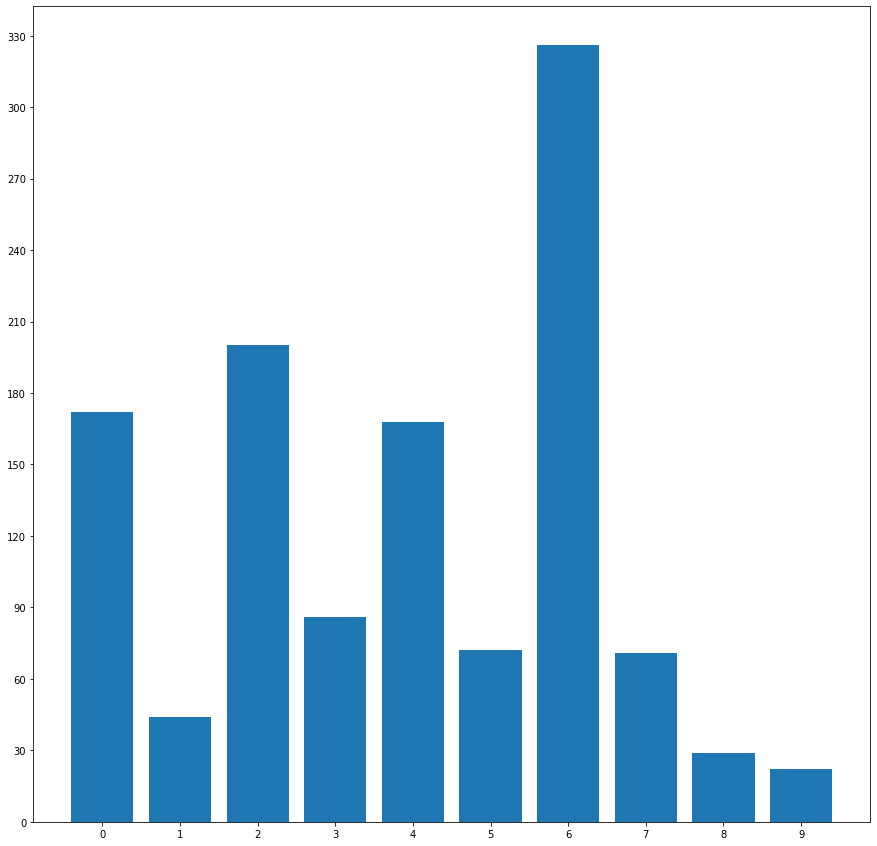

In [139]:
import collections
#predict=collections.Counter(predictions)
#labels=collections.Counter(test_labels.flatten())
#sort=sorted(predict.items(), key=lambda kv: (kv[1], kv[0]))
x=10000
def count_errors(x, labels):
    """Returns dict"""
    error_dict={a: 0 for a in range(10)} 
    for i in range(x):
        label = labels[i]
        if label != np.argmax(predictions[i]): error_dict[label] += 1
    return error_dict
errors = count_errors(x, test_labels)
print(errors)
errors_items_list=[error for error in errors.values()]
plt.figure(figsize=(15,15))
plt.bar(range(10), errors_items_list)
plt.xticks(range(10))
plt.yticks(range(0, 360, 30))
acc= (x-sum(errors_items_list)) / x
print(acc)